In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
from collections import Counter
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('ScamDataset.csv', delimiter=',', names=['message', 'label'])
df = df.drop_duplicates()

# Preprocess the text messages
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Potbottom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Potbottom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
# Plotting
def plot_feature_distribution(df, feature, title, xlim):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], color='skyblue', bins=100)
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xlim(xlim)
    plt.show()

In [77]:

df['processed_text'] = df.iloc[:, 0].apply(preprocess_text)


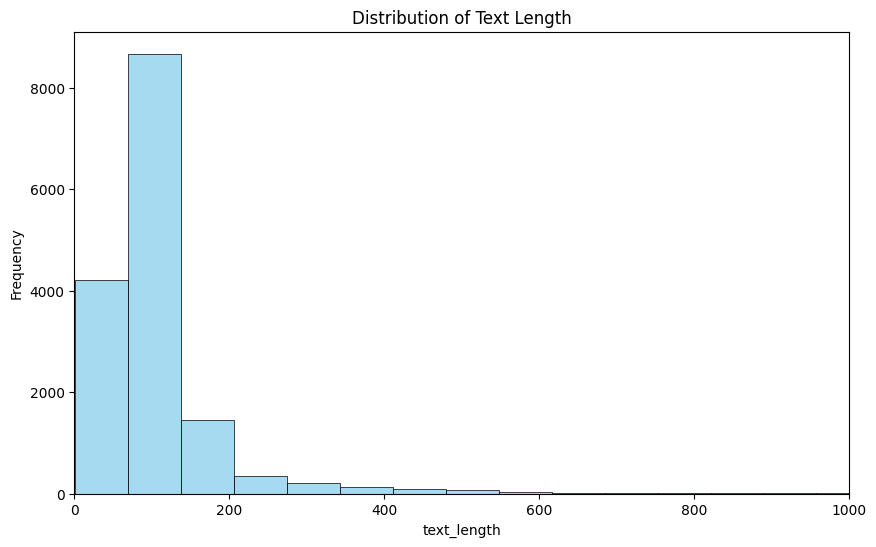

In [79]:

# Text Length Features
df['text_length'] = df['processed_text'].apply(len)

# Display the first few rows of the text length dataframe
df['text_length'].head()

plot_feature_distribution(df, 'text_length', 'Distribution of Text Length', xlim=(0,1000))


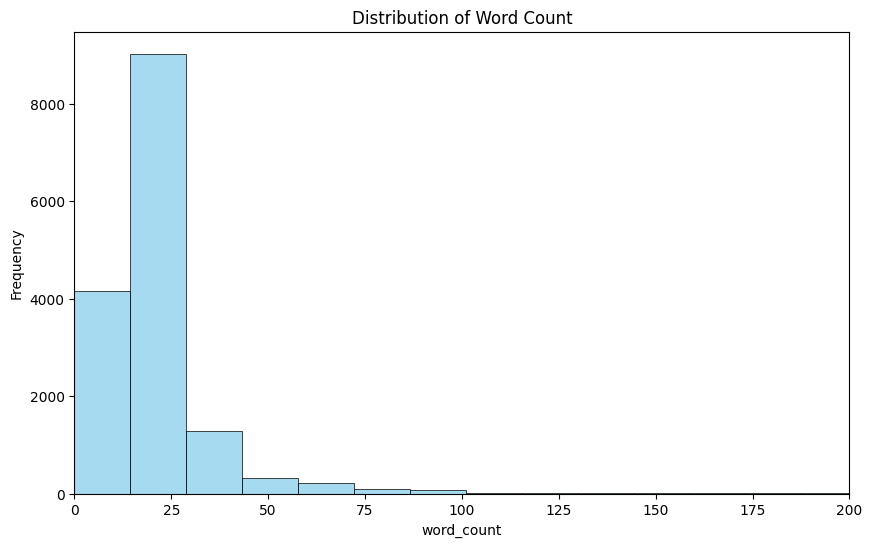

In [81]:

df['word_count'] = df['processed_text'].apply(lambda x: len(x.split()))

# Display the first few rows of the feature dataframe
df['word_count'].head()

plot_feature_distribution(df, 'word_count', 'Distribution of Word Count', xlim=(0, 200))


c:\Users\Potbottom\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Potbottom\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


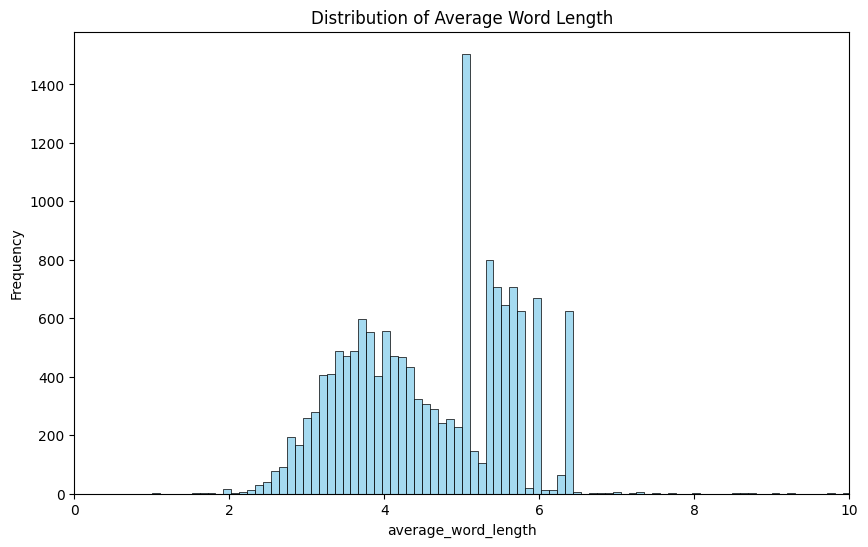

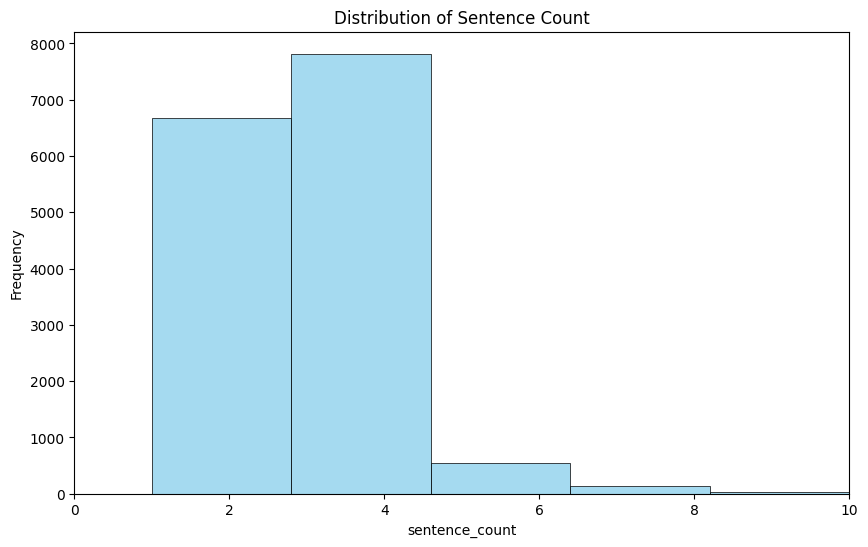

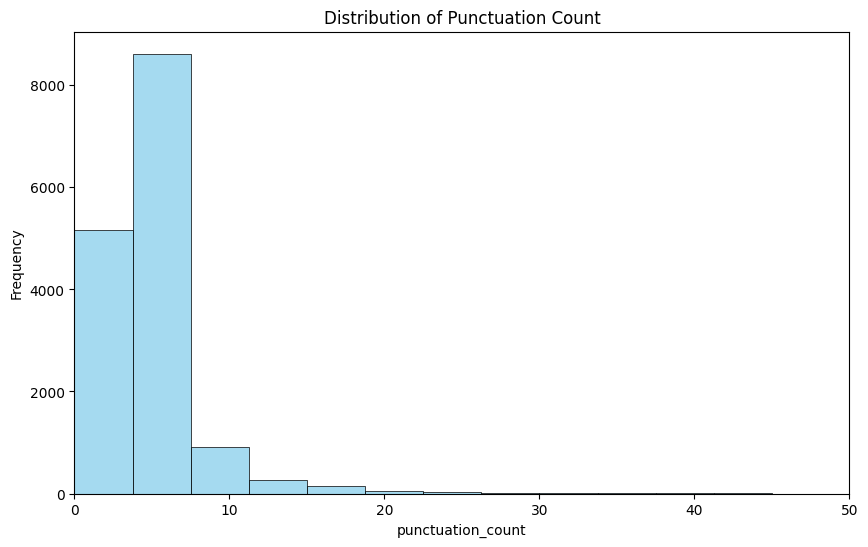

In [82]:

# Text Complexity Features
df['average_word_length'] = df['processed_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
df['sentence_count'] = df.iloc[:, 0].apply(lambda x: len(sent_tokenize(x)))
df['punctuation_count'] = df.iloc[:, 0].apply(lambda x: len([char for char in x if char in string.punctuation]))

plot_feature_distribution(df, 'average_word_length', 'Distribution of Average Word Length', xlim=(0, 10))
plot_feature_distribution(df, 'sentence_count', 'Distribution of Sentence Count', xlim=(0, 10))
plot_feature_distribution(df, 'punctuation_count', 'Distribution of Punctuation Count', xlim=(0, 50))


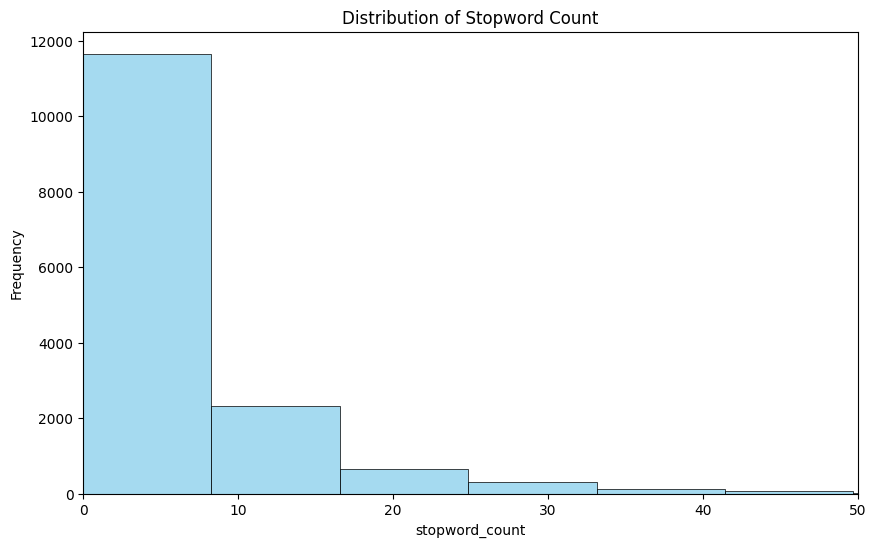

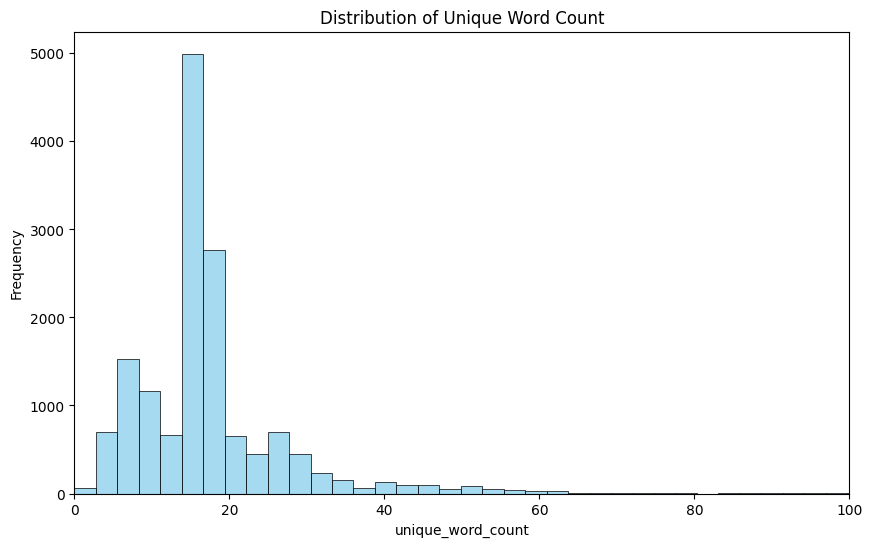

In [83]:

# Linguistic Features
stop_words = set(stopwords.words('english'))
df['stopword_count'] = df['processed_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
df['unique_word_count'] = df['processed_text'].apply(lambda x: len(set(x.split())))

plot_feature_distribution(df, 'stopword_count', 'Distribution of Stopword Count', xlim=(0, 50))
plot_feature_distribution(df, 'unique_word_count', 'Distribution of Unique Word Count', xlim=(0, 100))


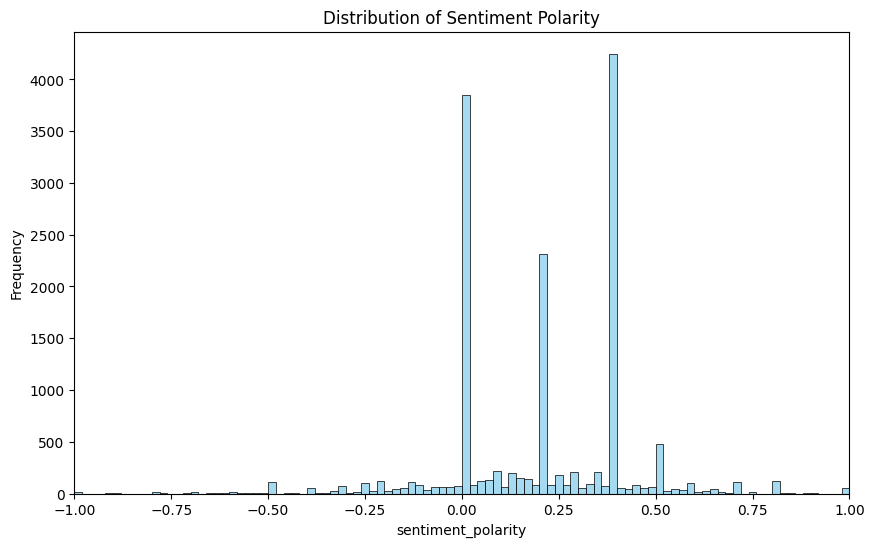

In [84]:

# Sentiment Analysis
df['sentiment_polarity'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plot_feature_distribution(df, 'sentiment_polarity', 'Distribution of Sentiment Polarity', xlim=(-1, 1))


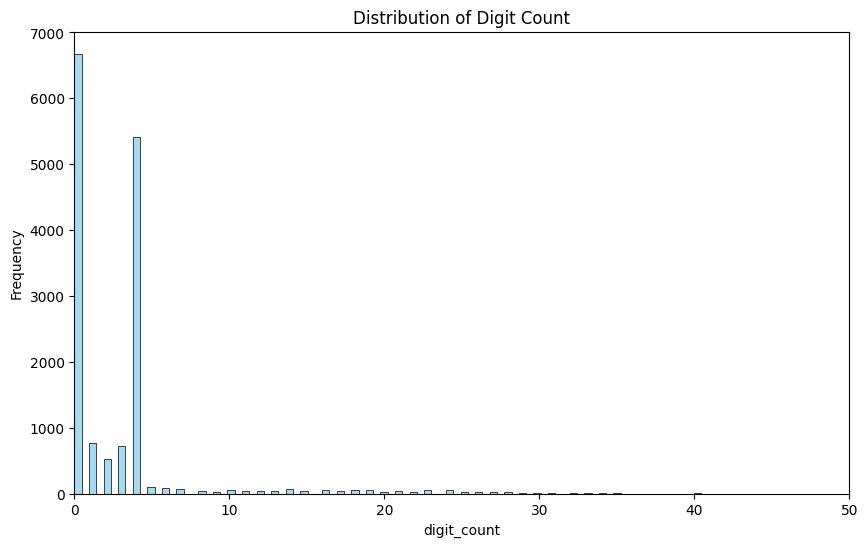

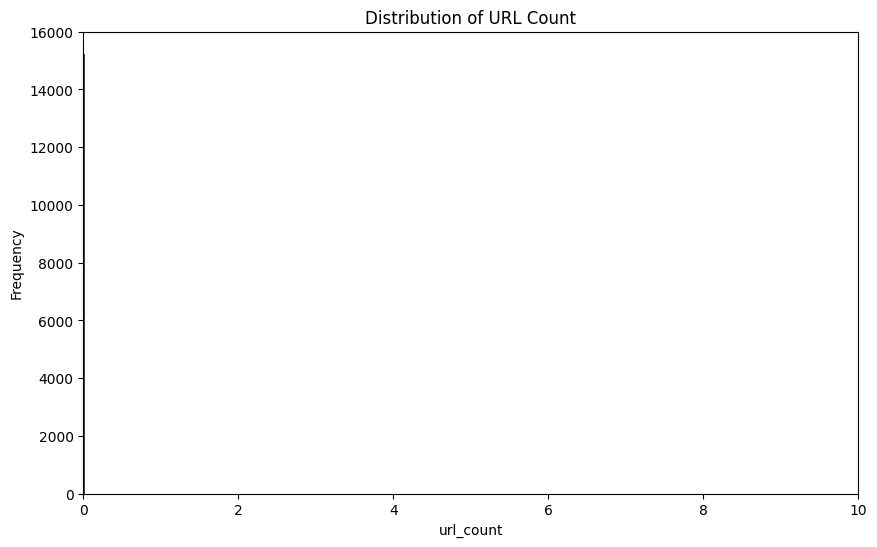

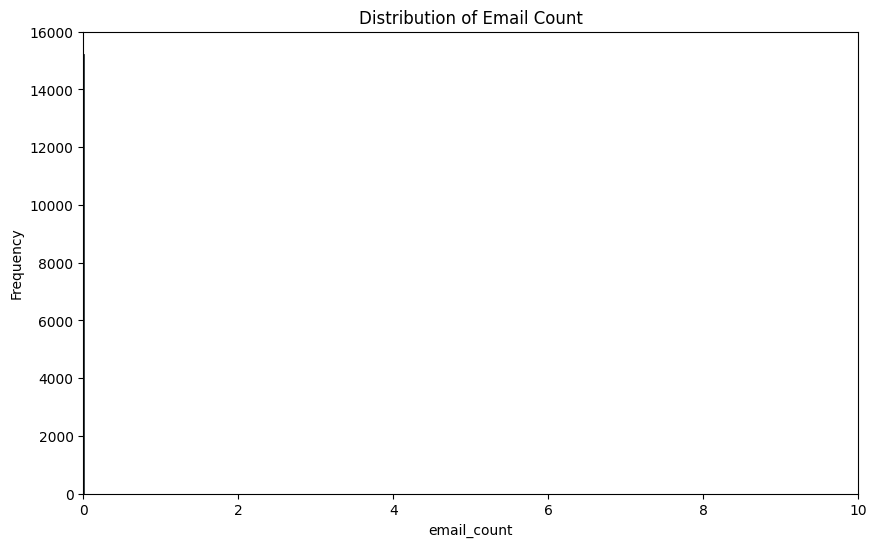

In [85]:

# Special Character Features
df['digit_count'] = df['processed_text'].apply(lambda x: len([char for char in x if char.isdigit()]))
df['url_count'] = df['processed_text'].apply(lambda x: len(re.findall(r'http[s]?://\S+', x)))
df['email_count'] = df['processed_text'].apply(lambda x: len(re.findall(r'\S+@\S+', x)))

plot_feature_distribution(df, 'digit_count', 'Distribution of Digit Count', xlim=(0, 50))
plot_feature_distribution(df, 'url_count', 'Distribution of URL Count', xlim=(0, 10))
plot_feature_distribution(df, 'email_count', 'Distribution of Email Count', xlim=(0, 10))


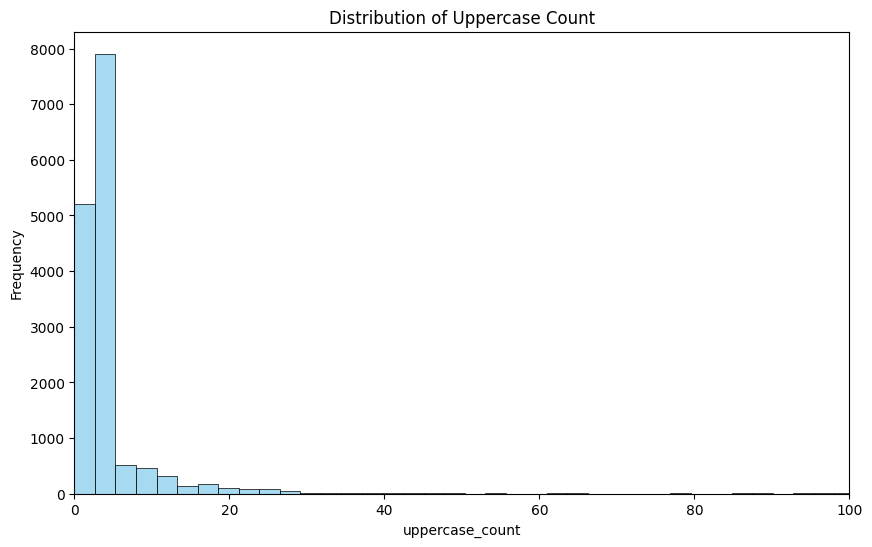

In [86]:

# Capitalization Features
df['uppercase_count'] = df.iloc[:, 0].apply(lambda x: len([char for char in x if char.isupper()]))
df['exclamation_count'] = df.iloc[:, 0].apply(lambda x: x.count('!'))

plot_feature_distribution(df, 'uppercase_count', 'Distribution of Uppercase Count', xlim=(0, 100))


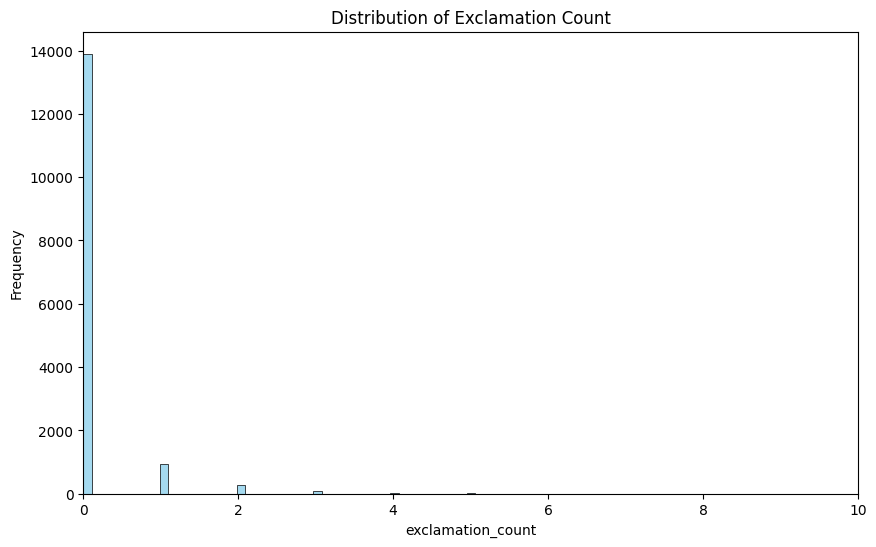

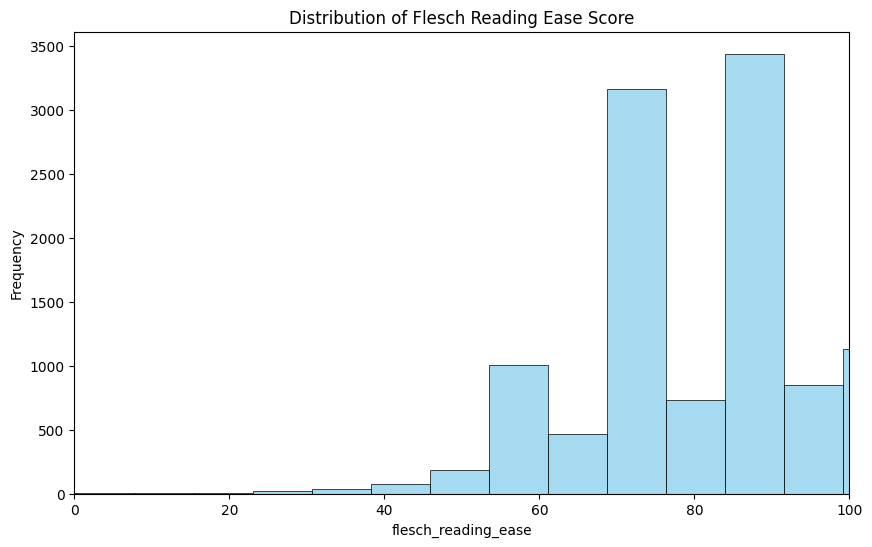

In [88]:

# Readability Scores (Flesch Reading Ease Score)
def flesch_reading_ease(text):
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    syllables = sum([len(re.findall(r'[aeiouy]+', word)) for word in words])
    if len(words) > 0 and len(sentences) > 0:
        return 206.835 - 1.015 * (len(words) / len(sentences)) - 84.6 * (syllables / len(words))
    else:
        return 0

df['flesch_reading_ease'] = df.iloc[:, 0].apply(flesch_reading_ease)

plot_feature_distribution(df, 'exclamation_count', 'Distribution of Exclamation Count', xlim=(0, 10))

plot_feature_distribution(df, 'flesch_reading_ease', 'Distribution of Flesch Reading Ease Score', xlim=(0, 100))


In [24]:

# N-Grams Features (using CountVectorizer for simplicity)
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df['processed_text'])
ngram_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# TF-IDF Features
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Combine all features into a single dataframe
feature_df = pd.concat([df, ngram_df, tfidf_df], axis=1)

# Display the first few rows of the feature dataframe
feature_df.head()


,message,label,processed_text,text_length,word_count,average_word_length,sentence_count,punctuation_count,stopword_count,unique_word_count,...,请马上来找我们,请马上来找我们 中国领事馆提醒您,转发,转发 打赏支持明镜与点点栏目,这是dhl国际快递最后语音通知,这是dhl国际快递最后语音通知 您有一份重要快件派送均无人签收,这里是ups国际快递,这里是ups国际快递 您有一份国际快递即将退回,重要通知书,重要通知书 尚未领取
0,"Go until jurong point, crazy.. Available only ...",normal,go until jurong point crazy available only in ...,103.0,20.0,4.150000,2.0,9.0,4.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Oh k. . I will come tomorrow,normal,oh k i will come tomorrow,25.0,6.0,3.333333,2.0,2.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,There was an error with your subscription. Ple...,fraud,there was an error with your subscription plea...,98.0,16.0,5.125000,2.0,2.0,8.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Well if I'm that desperate I'll just call arma...,normal,well if i m that desperate i ll just call arma...,54.0,12.0,3.583333,1.0,2.0,8.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,That's the trouble with classes that go well -...,normal,that s the trouble with classes that go well y...,131.0,26.0,4.038462,2.0,6.0,12.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
